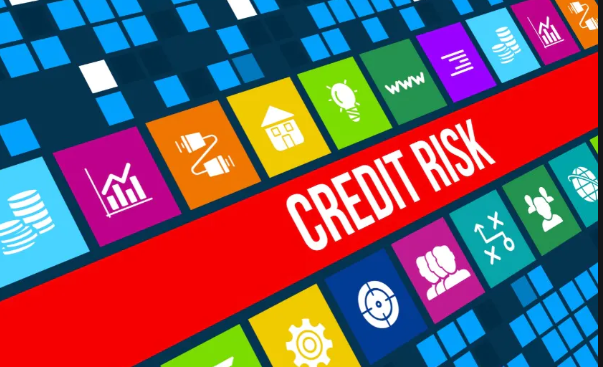

# 1. Introduction

<b>Context</b>
<p>
The dataset contains 1000 entries with 20 categorial/symbolic attributes prepared by Prof. Hofmann. In this dataset, each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to the set of attributes. The link to the original dataset can be found below.
</p>
<br/>
<b>Attribute Information:</b>
<br/>
<br/>
Attribute 1: (qualitative)<br/>
Status of existing checking account<br/>
A11 : ... &lt; 0 DM<br/>
A12 : 0 &lt;= ... &lt; 200 DM<br/>
A13 : ... &gt;= 200 DM / salary assignments for at least 1 year<br/>
A14 : no checking account<br/>
<br/>
Attribute 2: (numerical)<br/>
Duration in month<br/>

Attribute 3: (qualitative)<br/>
Credit history<br/>
A30 : no credits taken/ all credits paid back duly<br/>
A31 : all credits at this bank paid back duly<br/>
A32 : existing credits paid back duly till now<br/>
A33 : delay in paying off in the past<br/>
A34 : critical account/ other credits existing (not at this bank)<br/>

Attribute 4: (qualitative)<br/>
Purpose<br/>
A40 : car (new)<br/>
A41 : car (used)<br/>
A42 : furniture/equipment<br/>
A43 : radio/television<br/>
A44 : domestic appliances<br/>
A45 : repairs<br/>
A46 : education<br/>
A47 : (vacation - does not exist?)<br/>
A48 : retraining<br/>
A49 : business<br/>
A410 : others<br/>

Attribute 5: (numerical)
Credit amount<br/>

Attibute 6: (qualitative)
Savings account/bonds<br/>
A61 : ... < 100 DM<br/>
A62 : 100 <= ... < 500 DM<br/>
A63 : 500 <= ... < 1000 DM<br/>
A64 : .. >= 1000 DM<br/>
A65 : unknown/ no savings account<br/>

Attribute 7: (qualitative)<br/>
Present employment since<br/>
A71 : unemployed<br/>
A72 : ... < 1 year<br/>
A73 : 1 <= ... < 4 years<br/>
A74 : 4 <= ... < 7 years<br/>
A75 : .. >= 7 years<br/>
Attribute 8: (numerical)<br/>
Installment rate in percentage of disposable income<br/>

Attribute 9: (qualitative)<br/>
Personal status and sex<br/>
A91 : male : divorced/separated<br/>
A92 : female : divorced/separated/married<br/>
A93 : male : single<br/>
A94 : male : married/widowed<br/>
A95 : female : single<br/>

Attribute 10: (qualitative)<br/>
Other debtors / guarantors<br/>
A101 : none<br/>
A102 : co-applicant<br/>
A103 : guarantor<br/>

Attribute 11: (numerical)<br/>
Present residence since<br/><br/>

Attribute 12: (qualitative)<br/>
Property<br/>
A121 : real estate<br/>
A122 : if not A121 : building society savings agreement/ life insurance<br/>
A123 : if not A121/A122 : car or other, not in attribute 6<br/>
A124 : unknown / no property<br/>

Attribute 13: (numerical)<br/>
Age in years<br/>

Attribute 14: (qualitative)<br/>
Other installment plans<br/>
A141 : bank<br/>
A142 : stores<br/>
A143 : none<br/>

Attribute 15: (qualitative)<br/>
Housing<br/>
A151 : rent<br/>
A152 : own<br/>
A153 : for free<br/>

Attribute 16: (numerical)
Number of existing credits at this bank
<br/>
Attribute 17: (qualitative)<br/>
Job<br/>
A171 : unemployed/ unskilled - non-resident<br/>
A172 : unskilled - resident<br/>
A173 : skilled employee / official<br/>
A174 : management/ self-employed/
highly qualified employee/ officer

Attribute 18: (numerical)<br/>
Number of people being liable to provide maintenance for<br/>

Attribute 19: (qualitative)<br/>
Telephone<br/>
A191 : none<br/>
A192 : yes, registered under the customers name<br/>

Attribute 20: (qualitative)<br/>
foreign worker<br/>
A201 : yes<br/>
A202 : no
<br/>

Attribute 21: Numeric label <br/>
rating<br/>
1 : Good
2: Bad

<b>Goal:</b> To find the best appropriate model,which to a large extent correctly classifies the new customers as Good Risk or Bad Risk.
<br/>

<b>Author:</b>
<p>
Mohammed Nifaullah Sailappai <br/>
Masters in Busniess Analytics (2019-20) <br/>
University of Cincinnati <br/>
    <a href='https://www.linkedin.com/in/nifaullah/'> LinkedIn </a>
</p>
<br/>

<b>Dates:</b> 19th - 24th December 2019

<b>Version</b> 1.0

<b>Acknowledgements</b>
<br/>
Source: <a href='https://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29'> UCI </a>
<br/>

# 2. Exploratory Data Analysis

# 2.1 Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import normalize
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
import itertools
#Classification Algorithms
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import Perceptron

# 2.2 Data

I first load the data and add column manually as the source file doesn't contain the column names and then check shape and the head of the data to see if everything is appropriate. we found everything to be appropriate.

In [2]:
ColNames = ["chk_acct_stat", "duration", "credit_history", "purpose", 
                            "credit_amount", "sav_acct", "present_emp", "instlmt_rate", "sex", "other_debtors", 
                            "present_res", "property", "age", "other_instlmt_plans", "housing", "existing_credits", 
                            "job", "maintenance_abl", "telephone", "foreign", "rating"]

dfOriginal = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data", 
                         delimiter = ' '
                         , names = ColNames)

In [3]:
dfOriginal.shape

(1000, 21)

In [4]:
dfOriginal.head()

,chk_acct_stat,duration,credit_history,purpose,credit_amount,sav_acct,present_emp,instlmt_rate,sex,other_debtors,...,property,age,other_instlmt_plans,housing,existing_credits,job,maintenance_abl,telephone,foreign,rating
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


# 2.3 Data Wrangling & Analysis

There're 13 categorical variables and 8 numerical variables including the label.

In [5]:
dfOriginal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
chk_acct_stat          1000 non-null object
duration               1000 non-null int64
credit_history         1000 non-null object
purpose                1000 non-null object
credit_amount          1000 non-null int64
sav_acct               1000 non-null object
present_emp            1000 non-null object
instlmt_rate           1000 non-null int64
sex                    1000 non-null object
other_debtors          1000 non-null object
present_res            1000 non-null int64
property               1000 non-null object
age                    1000 non-null int64
other_instlmt_plans    1000 non-null object
housing                1000 non-null object
existing_credits       1000 non-null int64
job                    1000 non-null object
maintenance_abl        1000 non-null int64
telephone              1000 non-null object
foreign                1000 non-null object
rating               

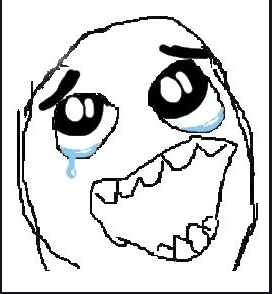

<center><h2>Wait..What? No Null values. Unbelievable!! </h2></center>

We cannot analyze efficiently until we transform majority of columns. Let's do a feature by feature analysis and transform the columns appropriately. Let's first start with categorical data

# 2.4 Categorical Type

# 2.4.1 Checking Account Status

A11 : ... < 0 DM <br/>
A12 : 0 <= ... < 200 DM<br/>
A13 : ... >= 200 DM / salary assignments for at least 1 year<br/>
A14 : no checking account<br/>
DM: Deutsche Mark <br/>

This attribute seems like ordinal although, I'll first see if there's a significant difference for different categories. Only if I found it to be significant (visually) I'll transform the variables otherwise I'll drop it. We will follow the same process for each variable.

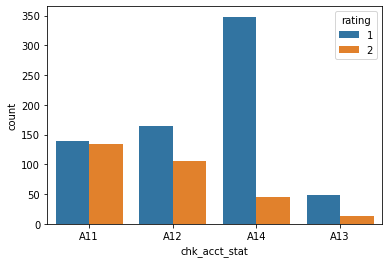

In [6]:
sns.countplot(x = 'chk_acct_stat', hue='rating', data=dfOriginal)

Clearly, from the above plot we can see that proportionately there's siginificant difference among the categories therefore we transform & keep the variable for now

In [7]:
dfOriginal['chk_acct_stat'] = dfOriginal['chk_acct_stat'].map({'A14': 0, 'A11': 1, 'A12': 2, 'A13':3})
dfOriginal['chk_acct_stat'].unique()

array([1, 2, 0, 3], dtype=int64)

# 2.4.2 Credit History
Credit history<br/>
A30 : no credits taken/ all credits paid back duly<br/>
A31 : all credits at this bank paid back duly<br/>
A32 : existing credits paid back duly till now<br/>
A33 : delay in paying off in the past<br/>
A34 : critical account/ other credits existing (not at this bank)<br/>

Clearly this is again a ordinal categorical variable and intuitively feels like a very inportant variable. Let's see the frequency distribution<br/>

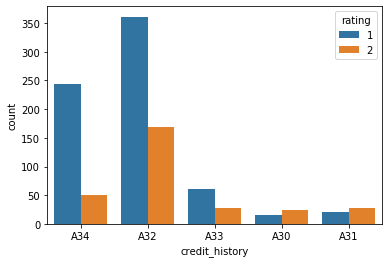

In [8]:
sns.countplot(x = 'credit_history', hue='rating', data=dfOriginal)

Proportionately the results are very surprising, people with no credit history and good credit history at this particular bank are more likely to default and people with bad history have tend to do well with this particular bank. There could be multiole reasons for this, but for now let's just transsform the variables and move forward with the analysis

In [9]:
dfOriginal['credit_history'] = dfOriginal['credit_history'].map({'A30': 0, 'A31': 1, 'A32': 2, 'A33':3, 'A34':4})
dfOriginal['credit_history'].unique()                                                               

array([4, 2, 3, 0, 1], dtype=int64)

# 2.4.3 Purpose

A40 : car (new) <br/>
A41 : car (used)<br/>
A42 : furniture/equipment<br/>
A43 : radio/television<br/>
A44 : domestic appliances<br/>
A45 : repairs<br/>
A46 : education<br/>
A47 : vacation/does not exist <br/>
A48 : retraining<br/>
A49 : business<br/>
A410 : others<br/>

These are nominal categorical variables which needs to be one hot encoded before we feed it into any machine learning algorithm but before that we'd like to see if there's any significant diffference across different categories.

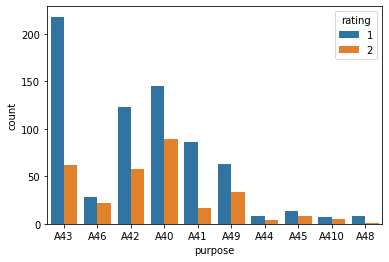

In [10]:
sns.countplot(x = 'purpose', hue='rating', data=dfOriginal)

Proportionately, people loaning for domestic appliances, repairs and eductaion are more likely to default, but the number of loans provided in these categories are also proportionately low compared to other well performing categories.

Now I  create one hot encoded version of the purpose column as the data is nominal for further analysis. For now I am keeping the original column, I'll drop altogether when I feed the data to the classifiers.

In [11]:
dfOriginal['purpose'] = dfOriginal['purpose'].map(
    {'A40': 'car_new', 'A41': 'car_old', 'A42': 'furniture', 'A43':'radio_tv', 'A44':'domestic_appliances',
    'A45': 'repairs', 'A46': 'education', 'A47': 'vacation', 'A48':'retraining', 'A49':'business',
    'A410':'others'})

In [12]:
dfOriginal = pd.concat([dfOriginal, pd.get_dummies(dfOriginal['purpose'])], axis=1);
dfOriginal.columns

Index(['chk_acct_stat', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'sav_acct', 'present_emp', 'instlmt_rate', 'sex',
       'other_debtors', 'present_res', 'property', 'age',
       'other_instlmt_plans', 'housing', 'existing_credits', 'job',
       'maintenance_abl', 'telephone', 'foreign', 'rating', 'business',
       'car_new', 'car_old', 'domestic_appliances', 'education', 'furniture',
       'others', 'radio_tv', 'repairs', 'retraining'],
      dtype='object')

# 2.4.4 Savings Account/Bonds

A61 : ... < 100 DM <br/>
A62 : 100 <= ... < 500 DM <br/>
A63 : 500 <= ... < 1000 DM <br/>
A64 : .. >= 1000 DM <br/>
A65 : unknown/ no savings account <br/>

DM = Deutsche Mark

This is similiar to the checking account feature, we'll do similar sort of group wise frequency count to see any siginificant differences.

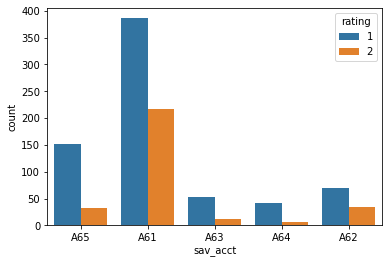

In [13]:
sns.countplot(x = 'sav_acct', hue='rating', data=dfOriginal)

people with no savings account seem to be doing well proportionately along with 2 groups with higher savings. Now let's convert this into a ordinal categorical variable.

In [14]:
dfOriginal['sav_acct'] = dfOriginal['sav_acct'].map({'A61': 0, 'A62': 1, 'A63': 2, 'A64':3, 'A65':4})
dfOriginal['sav_acct'].unique()

array([4, 0, 2, 3, 1], dtype=int64)

# 2.4.5 Present employment since
A71 : unemployed <br/>
A72 : ... < 1 year <br/>
A73 : 1 <= ... < 4 years <br/>
A74 : 4 <= ... < 7 years <br/>
A75 : .. >= 7 years <br/>

Quite Clearly this is a ordinal variable with a natural order, first we'll see the group wise frequency distributions for each category before converting it to numbers.

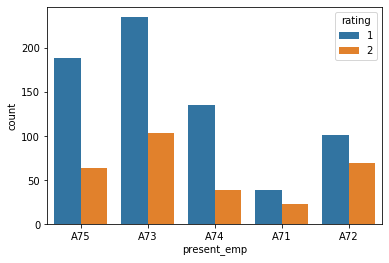

In [15]:
sns.countplot(x = 'present_emp', hue='rating', data=dfOriginal)

From the above plot proportionately this doesn't seem to make much of a clear difference, my intuition is that I'll end up dropping this variable but for now I am keeping it to see just incase if it has some sub-groupings

In [16]:
dfOriginal['present_emp'] = dfOriginal['present_emp'].map({'A71': 0, 'A72': 1, 'A73': 2, 'A74':3, 'A75':4})
dfOriginal['present_emp'].unique()

array([4, 2, 3, 0, 1], dtype=int64)

# 2.4.6 Sex & Marital Status

Attribute 9: (qualitative) <br/>
Personal status and sex <br/>
A91 : male : divorced/separated <br/>
A92 : female : divorced/separated/married <br/>
A93 : male : single<br/>
A94 : male : married/widowed<br/>
A95 : female : single<br/>

We'll first do the usual groupwise analysis, there's no point seperating features here as separated columns will be same as that joint columns

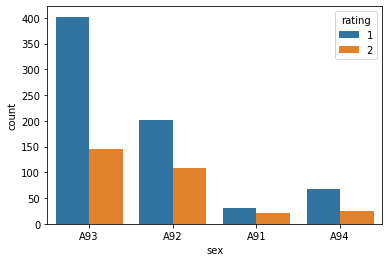

In [17]:
sns.countplot(x = 'sex', hue='rating', data=dfOriginal)

Oops there's a missing category in the data, there're no single females. But lets continue with the data we have & one hot encode this column as this is a nominal categorical variable 

In [18]:
dfOriginal['sex'] = dfOriginal['sex'].map(
    {'A91': 'male_div_sep', 'A92': 'female_div_mar_sep', 'A93':'male_single', 'A94':'male_mar_wid','A95': 'female_single'})

In [19]:
dfOriginal = pd.concat([dfOriginal, pd.get_dummies(dfOriginal['sex'])], axis=1);
dfOriginal.columns

Index(['chk_acct_stat', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'sav_acct', 'present_emp', 'instlmt_rate', 'sex',
       'other_debtors', 'present_res', 'property', 'age',
       'other_instlmt_plans', 'housing', 'existing_credits', 'job',
       'maintenance_abl', 'telephone', 'foreign', 'rating', 'business',
       'car_new', 'car_old', 'domestic_appliances', 'education', 'furniture',
       'others', 'radio_tv', 'repairs', 'retraining', 'female_div_mar_sep',
       'male_div_sep', 'male_mar_wid', 'male_single'],
      dtype='object')

# 2.4.7 Other debtors / guarantors

A101 : none<br/>
A102 : co-applicant<br/>
A103 : guarantor

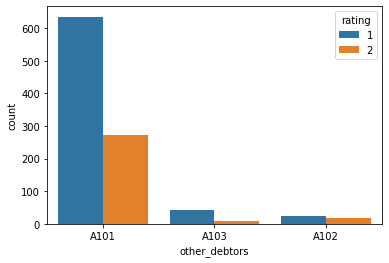

In [20]:
sns.countplot(x = 'other_debtors', hue='rating', data=dfOriginal)

Quite clear divide for this categorical variable loanees with guarantors are most likely to repay correctly as opposed to other categories.

In [21]:
dfOriginal['other_debtors'] = dfOriginal['other_debtors'].map({'A101': 0, 'A102': 1, 'A103': 2})
dfOriginal['other_debtors'].unique()

array([0, 2, 1], dtype=int64)

# 2.4.8 Property

A121 : real estate <br/>
A122 : if not A121 : building society savings agreement/ life insurance<br/>
A123 : if not A121/A122 : car or other, not in attribute 6 <br/>
A124 : unknown / no property

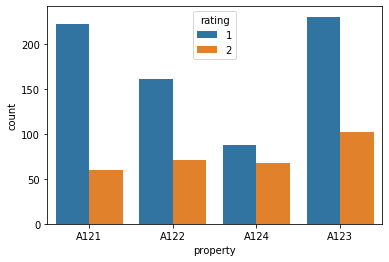

In [22]:
sns.countplot(x = 'property', hue='rating', data=dfOriginal)

Results are as expected, loanees with no property are more likely to default than loanees with properties

In [23]:
dfOriginal['property'] = dfOriginal['property'].map({'A121': 0, 'A122': 1, 'A123': 2, 'A124': 3})
dfOriginal['property'].unique()

array([0, 1, 3, 2], dtype=int64)

# 2.4.9 Other installment plans
A141 : bank<br/>
A142 : stores<br/>
A143 : none<br/>

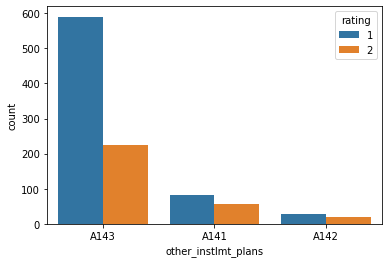

In [24]:
sns.countplot(x = 'other_instlmt_plans', hue='rating', data=dfOriginal)

Loanees with other loan installments are more likely to default than loanees with no innstallments

In [25]:
dfOriginal['other_instlmt_plans'] = dfOriginal['other_instlmt_plans'].map({'A141': 0, 'A142': 1, 'A143': 2})
dfOriginal['other_instlmt_plans'].unique()

array([2, 0, 1], dtype=int64)

# 2.4.10 Housing
A151 : rent <br/>
A152 : own <br/>
A153 : for free <br/>

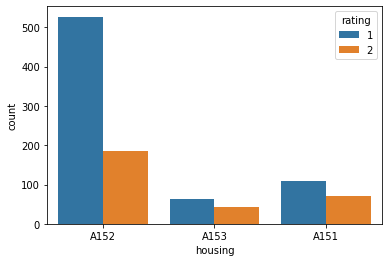

In [26]:
sns.countplot(x = 'housing', hue='rating', data=dfOriginal)

Results are as expected, loanees with own houses are more likely to repay the installments in time incomparison to people who live for free or in rented house

In [27]:
dfOriginal['housing'] = dfOriginal['housing'].map({'A151': 0, 'A152': 1, 'A153': 2})
dfOriginal['housing'].unique()

array([1, 2, 0], dtype=int64)

# 2.4.11 Job
A171 : unemployed/ unskilled - non-resident <br/>
A172 : unskilled - resident<br/>
A173 : skilled employee / official<br/>
A174 : management/ self-employed/highly qualified employee/ officer

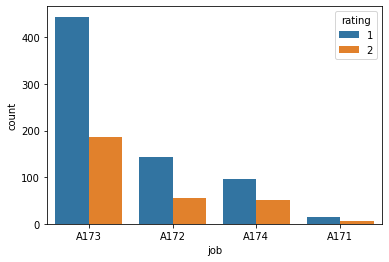

In [28]:
sns.countplot(x = 'job', hue='rating', data=dfOriginal)

People who're unemployed are more likely to default but they're also less likely to secure a loan in first place. However people at the highest designation tend to default more incomparison to people in middle level designations

In [29]:
dfOriginal['job'] = dfOriginal['job'].map({'A171': 0, 'A172': 1, 'A173': 2, 'A174': 3})
dfOriginal['job'].unique()

array([2, 1, 3, 0], dtype=int64)

# 2.4.12 Telephone

A191 : none<br/>
A192 : yes, registered under the customers name


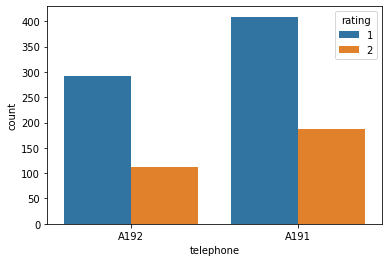

In [30]:
sns.countplot(x = 'telephone', hue='rating', data=dfOriginal)

Proportionately there isn't much of a difference, Most likely i'll drop this variable but I am keep it for now just incase we may see subgroups under groups.

In [31]:
dfOriginal['telephone'] = dfOriginal['telephone'].map({'A191': 0, 'A192': 1})
dfOriginal['telephone'].unique()

array([1, 0], dtype=int64)

# 2.4.13 Foreign worker

A201 : yes <br/>
A202 : no


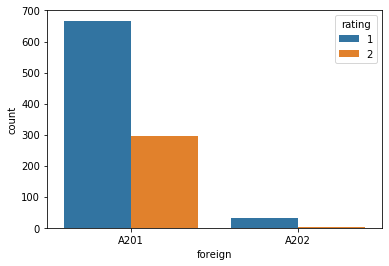

In [32]:
sns.countplot(x = 'foreign', hue='rating', data=dfOriginal)

Proportionately foreign nationals are repaying better but also proportionately number of loans given to foreign nationals is very low.

In [33]:
dfOriginal['foreign'] = dfOriginal['foreign'].map({'A201': 0, 'A202': 1})
dfOriginal['foreign'].unique()

array([0, 1], dtype=int64)

# 2.5 Numerical Variables

# 2.5.1 Duration

First we define GroupBoxDistPlot function which would take column name as input and would return a group wise (in this case rating) combination of box plot and distribution plot which would help us gauge the density among various other characteristics of the variable

In [34]:
def GroupBoxDistPlot(column):
    f, (ax_box, ax_hist, ax_box1) = plt.subplots(3, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1, 0.2)})
    mean=dfOriginal[dfOriginal.rating == 1][column].mean()
    median=dfOriginal[dfOriginal.rating == 1][column].median()

    sns.boxplot(dfOriginal[dfOriginal.rating == 1][column], ax=ax_box)
    ax_box.axvline(mean, color='r', linestyle='--')
    ax_box.axvline(median, color='g', linestyle='-')

    sns.distplot(dfOriginal[dfOriginal.rating == 1][column], ax=ax_hist)
    ax_hist.axvline(mean, color='r', linestyle='--')
    ax_hist.axvline(median, color='g', linestyle='-')

    mean=dfOriginal[dfOriginal.rating == 2][column].mean()
    median=dfOriginal[dfOriginal.rating == 2][column].median()

    sns.boxplot(dfOriginal[dfOriginal.rating == 2][column], ax=ax_box1)
    ax_box1.axvline(mean, color='r', linestyle='--')
    ax_box1.axvline(median, color='g', linestyle='-')

    sns.distplot(dfOriginal[dfOriginal.rating == 2][column], ax=ax_hist)
    ax_hist.axvline(mean, color='r', linestyle='--')
    ax_hist.axvline(median, color='g', linestyle='-')


    ax_box.set(xlabel='')
    ax_hist.set(xlabel='')
    plt.show()

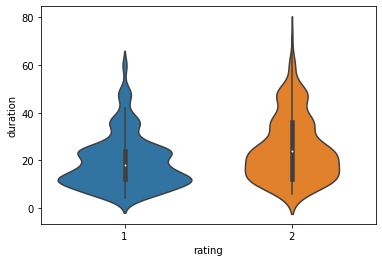

In [35]:
sns.violinplot(x='rating', y="duration",
            data=dfOriginal)

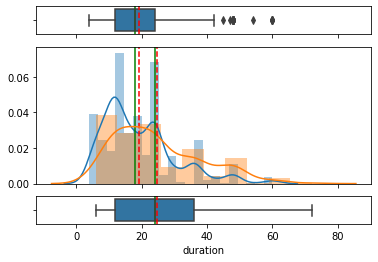

In [36]:
GroupBoxDistPlot('duration')

From the above distributions (or density plots) we can see that people with lower chance of default generally gather around range of 15 - 25 whereas the other group has more wider distribution and has greater mean and median, which again forces us to keep this variable

# 2.5.2 Credit Amount

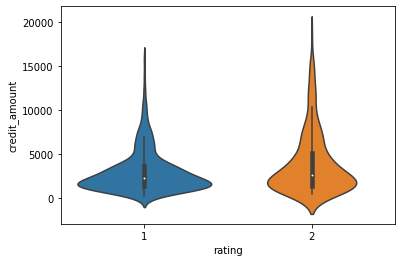

In [37]:
sns.violinplot(x='rating', y="credit_amount",
            data=dfOriginal)

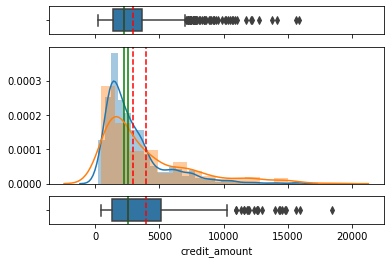

In [38]:
GroupBoxDistPlot('credit_amount')

Again the distribution for both the group varies similar to that of duration, may be both these column reveal the same information we need to do more analysis before we can remove on variable. Also both groups have very high number of outliers.

# 2.5.3 Installment rate

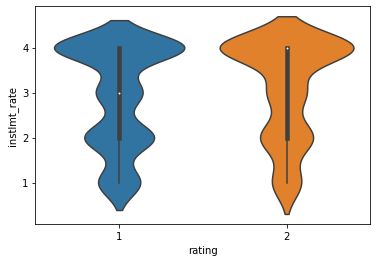

In [39]:
sns.violinplot(x='rating', y="instlmt_rate",
            data=dfOriginal)

It's clear that people who default often have the higher rate compared to people who don't default

# 2.5.4 Present Residence Since

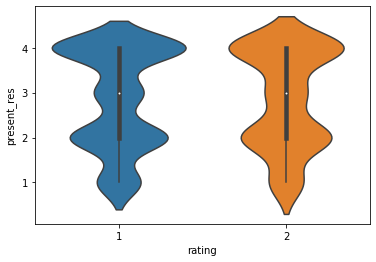

In [40]:
sns.violinplot(x='rating', y="present_res",
            data=dfOriginal)

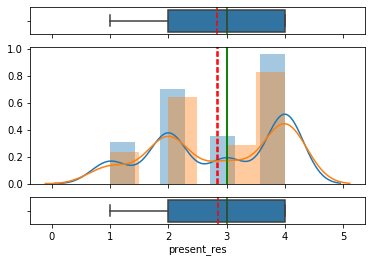

In [41]:
GroupBoxDistPlot('present_res')

Not a great differentiator most likely we will drop this column.

# 2.5.5 Age

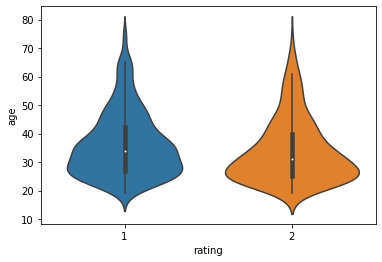

In [42]:
sns.violinplot(x='rating', y="age",
            data=dfOriginal)

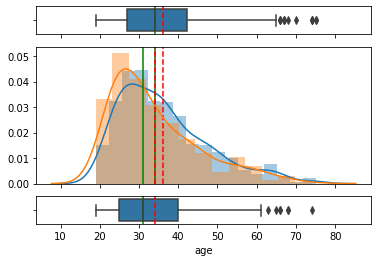

In [43]:
GroupBoxDistPlot('age')

Not too different but still age of the people who default have slightly narrower distribution and as a result overall mean and median is also less.

# 2.5.6 Existing Credits at the Bank

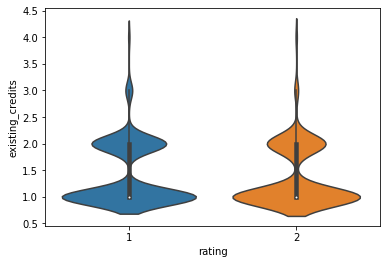

In [44]:
sns.violinplot(x='rating', y="existing_credits",
            data=dfOriginal)

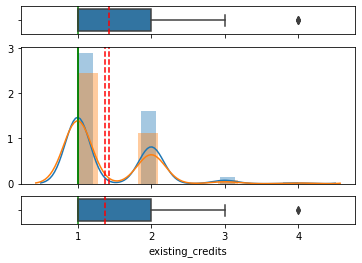

In [45]:
GroupBoxDistPlot('existing_credits')

Again, not a great differentiator most likely we will drop this column.

# 2.5.7 Number of people being liable to provide maintenance for

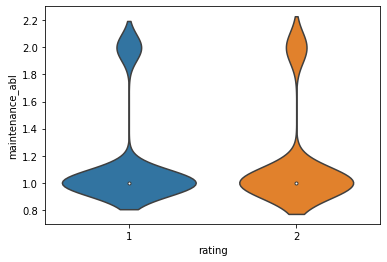

In [46]:
sns.violinplot(x='rating', y="maintenance_abl",
            data=dfOriginal)

Again, not a great differentiator most likely we will drop this column.

# 2.6 Descriptive Statistics

In [47]:
dfOriginal.shape

(1000, 35)

In [48]:
#Rearranging the Columns
dfNew = dfOriginal.drop(['rating'], axis = 1)
dfNew['rating'] = dfOriginal['rating']
print(dfNew.shape)
print(dfNew.columns)
dfOriginal = dfNew

(1000, 35)
Index(['chk_acct_stat', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'sav_acct', 'present_emp', 'instlmt_rate', 'sex',
       'other_debtors', 'present_res', 'property', 'age',
       'other_instlmt_plans', 'housing', 'existing_credits', 'job',
       'maintenance_abl', 'telephone', 'foreign', 'business', 'car_new',
       'car_old', 'domestic_appliances', 'education', 'furniture', 'others',
       'radio_tv', 'repairs', 'retraining', 'female_div_mar_sep',
       'male_div_sep', 'male_mar_wid', 'male_single', 'rating'],
      dtype='object')


In [49]:
dfOriginal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 35 columns):
chk_acct_stat          1000 non-null int64
duration               1000 non-null int64
credit_history         1000 non-null int64
purpose                1000 non-null object
credit_amount          1000 non-null int64
sav_acct               1000 non-null int64
present_emp            1000 non-null int64
instlmt_rate           1000 non-null int64
sex                    1000 non-null object
other_debtors          1000 non-null int64
present_res            1000 non-null int64
property               1000 non-null int64
age                    1000 non-null int64
other_instlmt_plans    1000 non-null int64
housing                1000 non-null int64
existing_credits       1000 non-null int64
job                    1000 non-null int64
maintenance_abl        1000 non-null int64
telephone              1000 non-null int64
foreign                1000 non-null int64
business               1000 non-

In [50]:
dfOriginal.describe().T

,count,mean,std,min,25%,50%,75%,max
chk_acct_stat,1000.0,1.001,0.957034,0.0,0.0,1.0,2.00,3.0
duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_history,1000.0,2.545,1.083120,0.0,2.0,2.0,4.00,4.0
credit_amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
sav_acct,1000.0,1.105,1.580023,0.0,0.0,0.0,2.00,4.0
present_emp,1000.0,2.384,1.208306,0.0,2.0,2.0,4.00,4.0
instlmt_rate,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
other_debtors,1000.0,0.145,0.477706,0.0,0.0,0.0,0.00,2.0
present_res,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
property,1000.0,1.358,1.050209,0.0,0.0,1.0,2.00,3.0


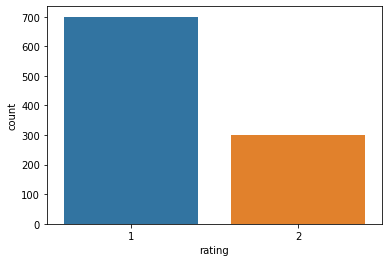

In [51]:
sns.countplot(dfOriginal.rating)

Very difficult to make sense of the descriptive stats but we can see an approximate 7:3 ratio between good and bad loanees, which is a very good number considering that banks usually have about 2-5% defaulters.

# 2.7 Correlation Matrix Heatmap

Correlation Matrix heatmap also doesn't reveal much as to which features are important

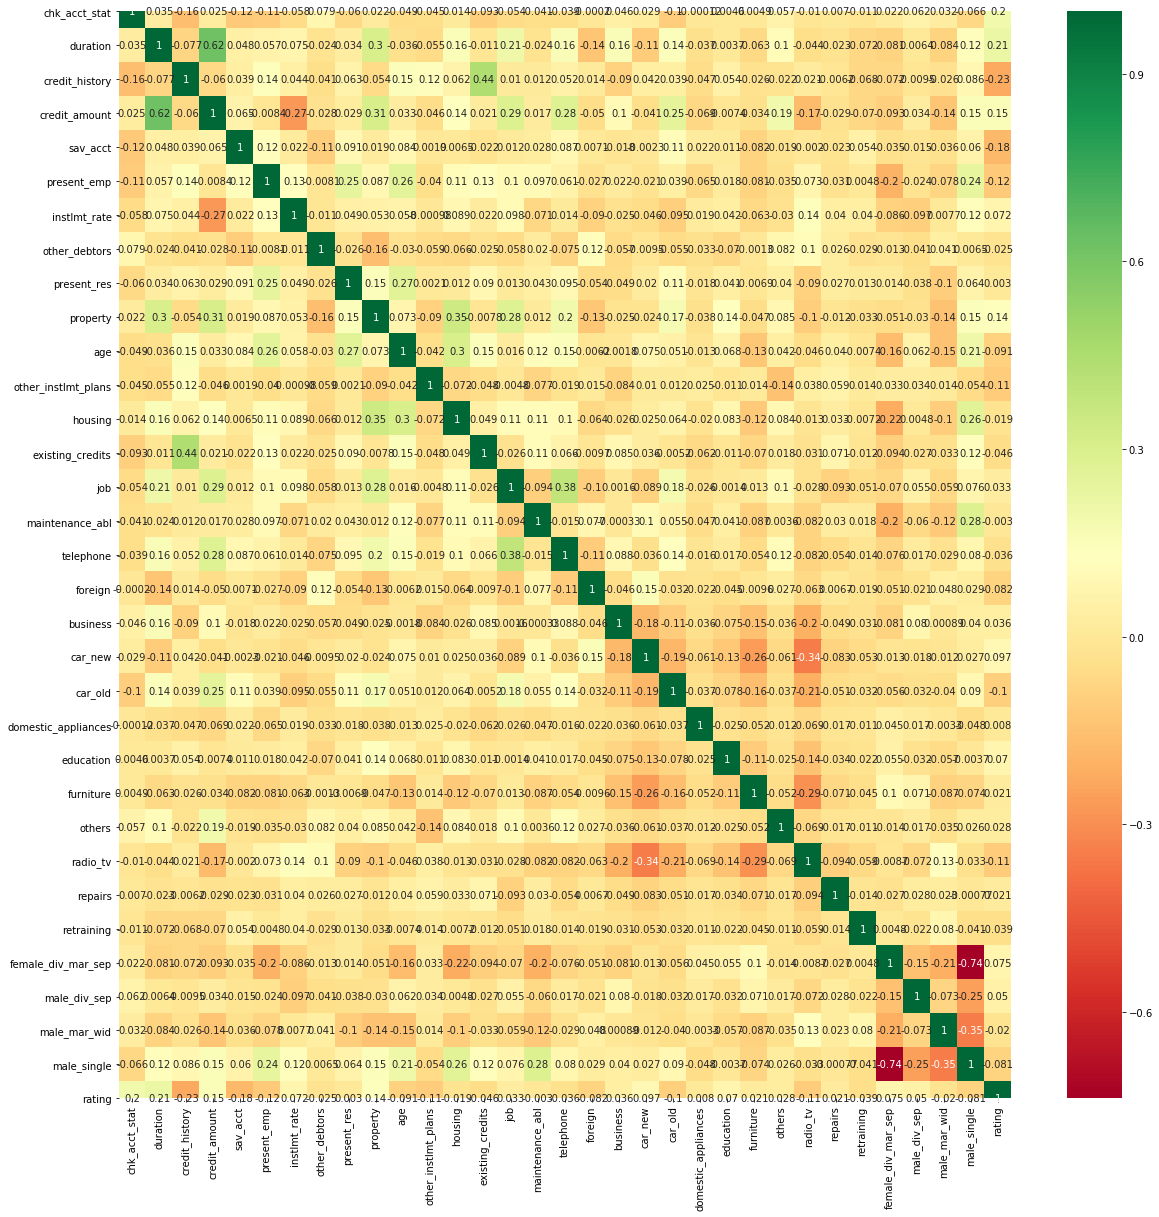

In [52]:
plt.figure(figsize=(20,20))
g=sns.heatmap(dfOriginal[dfOriginal.corr().index].corr(),annot=True,cmap="RdYlGn")

It's dificult to select features from above let's use the chi-square test and the extra tree classifier to wield out the important features

# 2.8 Feature Selection

First we select 10 best features using the SelectKBest method from sci-kit learn which again uses the chi-square test to get the best 10 features and we select 10 best feature after fitting the ensemble extra tree classifier. Then we take a mixture of features from both the excercise for our final model

In [53]:
X = dfOriginal.drop(['purpose','sex'], axis = 1).iloc[:,0:31]  #independent columns
y = dfOriginal.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(normalize(X, axis=0, norm='l2'),y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

            Specs     Score
4        sav_acct  1.185710
17        foreign  1.066583
20        car_old  0.880145
0   chk_acct_stat  0.816721
22      education  0.659966
27     retraining  0.509700
25       radio_tv  0.491914
19        car_new  0.470189
3   credit_amount  0.426502
1        duration  0.420735


[0.08721064 0.07730572 0.06254025 0.07612612 0.05149192 0.05582479
 0.04540836 0.02404149 0.04937471 0.04794682 0.060415   0.0322165
 0.03483939 0.0289382  0.03952332 0.02011889 0.03084795 0.00765241
 0.01403927 0.02223208 0.01405554 0.00345182 0.01196606 0.01756384
 0.00369542 0.0181625  0.00648347 0.00257166 0.02674221 0.01316065
 0.01405298]


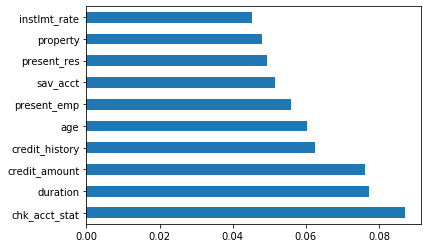

In [54]:
X = dfOriginal.drop(['purpose','sex'], axis = 1).iloc[:,0:31]  #independent columns
y = dfOriginal.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier(100)
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

I selected the below features as input to our model based on the results obtained after multiple trial & error experiments.

In [55]:
X = dfOriginal[['duration','credit_amount','chk_acct_stat', 'age',
                'sav_acct','present_emp','instlmt_rate','property',
                'present_res', 'credit_history', 'foreign', 'car_old' 
               ]]  #independent columns
y = dfOriginal.iloc[:,-1]  #labels
print(X.shape)
print(y.shape)
print(X.shape)
print(y.shape)

(1000, 12)
(1000,)
(1000, 12)
(1000,)


# 3. Classifier Selection By K-Fold Cross Validation

In this excercise I will shortlist 2 or 3 top classifers on the basis of the <b>precision</b> score obtained from Cross Validation. We choose percision over accuracy here because our data is a bank data where we're try to predict good and bad credits, and the cost associated with wrongly classifying a bad loan as good loan (False Positive) is very big compared to the cost of wrongly classifying a good as bad loan. Therfore a classifier which improves accuracy without sacrificing the <b>precision</b> would be the priority. Also, I use Cross Validation because it's likely to give a consistent and stable estimate of the precision score.

# 3.1 Decision Tree

In [56]:
dt = DecisionTreeClassifier()
dt_score = cross_val_score(dt, X, y, cv=10, scoring='precision')
print(dt_score.mean())

0.7680294873801303


# 3.2 Naive Bayes

In [57]:
nb = GaussianNB()
nb_scores_1 = cross_val_score(nb, X, y, cv=10, scoring='precision')
nb_scores_1.mean()

0.8196353525427676

# 3.3 K- Nearest Neighnours (KNN)

In [58]:
knn3 = KNeighborsClassifier(n_neighbors=3)
knn7 = KNeighborsClassifier(n_neighbors=7)
knn15 = KNeighborsClassifier(n_neighbors=15)
knn25 = KNeighborsClassifier(n_neighbors=25)
knn51 = KNeighborsClassifier(n_neighbors=51)
knn75 = KNeighborsClassifier(n_neighbors=75)
knn3_score = cross_val_score(knn3, X, y, cv=10, scoring='precision')
knn7_score = cross_val_score(knn7, X, y, cv=10, scoring='precision')
knn15_score = cross_val_score(knn15, X, y, cv=10, scoring='precision')
knn25_score = cross_val_score(knn25, X, y, cv=10, scoring='precision')
knn51_score = cross_val_score(knn51, X, y, cv=10, scoring='precision')
knn75_score = cross_val_score(knn75, X, y, cv=10, scoring='precision')
knn_accuracy_df = pd.DataFrame.from_dict({ 'Neighbours': [3,7,15,25,51,75],
    'Score': [knn3_score.mean(),knn7_score.mean(),knn15_score.mean(),
              knn25_score.mean(),knn51_score.mean(),knn75_score.mean()]})
print(knn_accuracy_df)

   Neighbours     Score
0           3  0.711346
1           7  0.717679
2          15  0.715747
3          25  0.710942
4          51  0.706163
5          75  0.705018


# 3.4 Support Vector Machine (SVM) - Linear

In [59]:
svm_linear = SVC(C=.05, kernel='linear')
svm_scores_1 = cross_val_score(svm_linear, X, y,cv=10, scoring='precision')
svm_scores_1.mean()

0.7481637209966575

# 3.5 Support Vector Machine (SVM) - Radial Basis Function (RBF)

In [60]:
svm_rbf_1 = SVC(C = 0.1, kernel='rbf', gamma=1) 
svm_rbf_scores_1 = cross_val_score(svm_rbf_1, X, y, cv=10, scoring='precision')
print(svm_rbf_scores_1.mean())

0.7


# 3.6 Logistic Regression

In [61]:
logreg_score = cross_val_score(LogisticRegression(solver='lbfgs', max_iter = 500), X, y, cv=10, scoring='precision')
print(logreg_score.mean())

0.7659346706970522


# 3.7 Perceptron

In [62]:
perceptron_score = cross_val_score(Perceptron(max_iter=100), X, y, cv=10, scoring='precision')
print(perceptron_score.mean())

0.6295604395604395


C:\Users\nifaullah\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


# 3.8 Random Forest

In [63]:
n_est_list = [1,2,3,4,5,10,20,40,100]
for n_est in n_est_list:
    random_forest = RandomForestClassifier(n_estimators=n_est)
    scores = cross_val_score(random_forest, X, y, cv=10, scoring='precision')
    print("Random Forest Accuracy: %.2f (+/- %.2f) #estimators: %d" % (scores.mean(), scores.std(), n_est))

Random Forest Accuracy: 0.76 (+/- 0.02) #estimators: 1
Random Forest Accuracy: 0.74 (+/- 0.03) #estimators: 2
Random Forest Accuracy: 0.79 (+/- 0.03) #estimators: 3
Random Forest Accuracy: 0.76 (+/- 0.01) #estimators: 4
Random Forest Accuracy: 0.78 (+/- 0.02) #estimators: 5
Random Forest Accuracy: 0.78 (+/- 0.02) #estimators: 10
Random Forest Accuracy: 0.79 (+/- 0.03) #estimators: 20
Random Forest Accuracy: 0.80 (+/- 0.03) #estimators: 40
Random Forest Accuracy: 0.80 (+/- 0.02) #estimators: 100


# 3.9 Extra Trees Classifier

In [64]:
et_score = cross_val_score(ExtraTreesClassifier(100), X, y, cv=10, scoring='precision')
et_score.mean()

0.7902962168711114

# 3.10 Boosting

In [65]:
dt = DecisionTreeClassifier(max_depth=6)
n_est_list = [1,2,3,4,5,10,15,40,100]
for n_est in n_est_list:
    boosting = AdaBoostClassifier(RandomForestClassifier(n_estimators=100), n_estimators=n_est)
    scores = cross_val_score(boosting, X, y, cv=10, scoring='precision')
    print("Boosting Accuracy: %.2f (+/- %.2f) #estimators: %d" % (scores.mean(), scores.std(), n_est))

Boosting Accuracy: 0.80 (+/- 0.03) #estimators: 1
Boosting Accuracy: 0.79 (+/- 0.02) #estimators: 2
Boosting Accuracy: 0.80 (+/- 0.03) #estimators: 3
Boosting Accuracy: 0.80 (+/- 0.02) #estimators: 4
Boosting Accuracy: 0.80 (+/- 0.02) #estimators: 5
Boosting Accuracy: 0.79 (+/- 0.02) #estimators: 10
Boosting Accuracy: 0.80 (+/- 0.03) #estimators: 15
Boosting Accuracy: 0.80 (+/- 0.03) #estimators: 40
Boosting Accuracy: 0.80 (+/- 0.03) #estimators: 100


# 3.11 Classfier Shortlisting

Thus from the above excercise, wherein I used the precision score obtained from k fold cross validation methodology, I shortlist 3 classfiers among which Naive Bayes has the highest precision followed by Random Forest and Extra Trees Classfifer. I don't consider bootsing because the underlying classifier inside boosting is again Random Forest, and boosting doesn't seem to improve upon the Random Forest's original performance without boosting. 

<table>
    <tr>
        <th> Classifier</th>
        <th> Cross Vaildation Precision Score</th>
    </tr>
    <tr> <td>Decision Tree</td> <td>76.93%</td></tr>
    <tr> <td>Naive Bayes</td> <td bgcolor ='green'>81.96%</td></tr>
    <tr> <td>KNN</td> <td>71.57%</td></tr>
    <tr> <td>SVM Linear</td> <td>74.8%</td></tr>
    <tr> <td>SVM RBF</td> <td>70%</td></tr>
    <tr> <td>Logistic Regression</td> <td>76.59%</td></tr>
    <tr> <td>Perceptron</td> <td>62.95%</td></tr>
    <tr> <td>Random Forest</td> <td bgcolor ='green'>80%</td></tr>
    <tr> <td>Extra Trees Classifier</td> <td bgcolor ='yellow'>79.23%</td></tr>
    <tr> <td>Boosting</td> <td>80%</td></tr>
</table>

# 4. Classifier Performance Evaluation

Now I check for different standard measures & see how each of the selected classifier performs on these measures. But first let's start with splitting the dataset into Train & Test. We reserve 20% of our data as Test and the rest as train. I use the Random Forest's & Extra Tree's in built method to deal with the class imbalance in the data(7:3), unfortunately as of now there's no such feature for the Naive Bayes method.

In [66]:
#Splitting 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

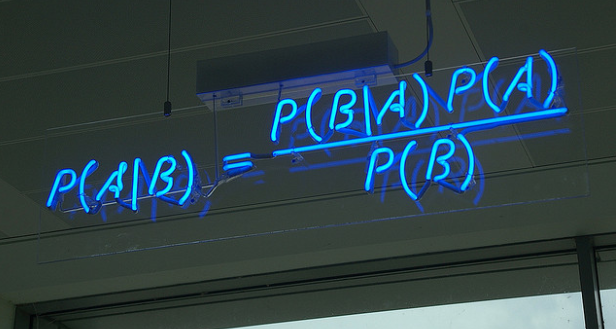
<center><h2>Naive Bayes</h2></center>

In [67]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_NB = nb.predict(X_test)

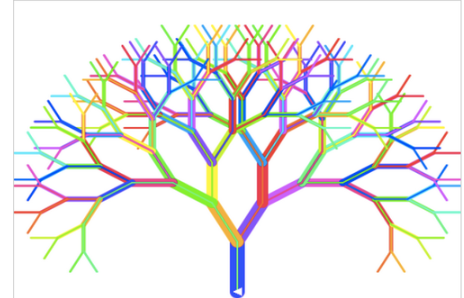
<center><h2>Random Forest</h2></center>

In [68]:
Random_Forest = RandomForestClassifier(n_estimators=100, class_weight='balanced')
Random_Forest.fit(X_train, y_train)
y_pred_RF = Random_Forest.predict(X_test)

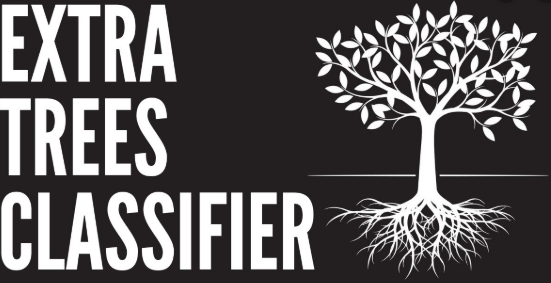
<center><h2>Extra Trees Classifier</h2></center>

In [69]:
Extra_Trees = ExtraTreesClassifier(n_estimators=100, class_weight='balanced')
Extra_Trees.fit(X_train, y_train)
y_pred_ET = Extra_Trees.predict(X_test)

# 4.1 Confusion Matrix
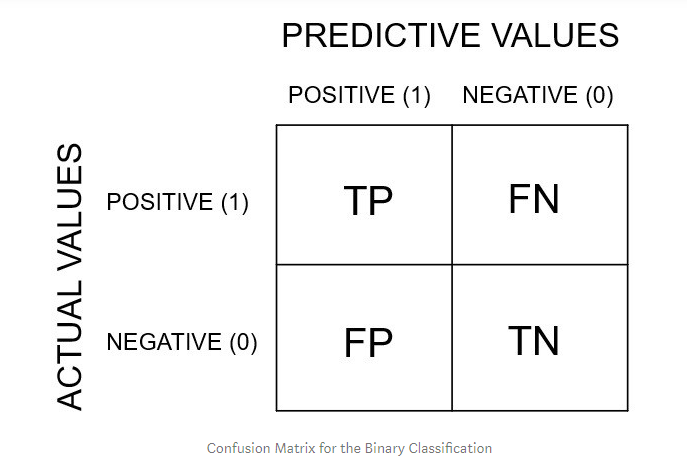

Confusion matrix by itself doesn't give the full picture, Measures derived from components of confusion matrix gives a good idea about the performance of a classifer.

In [70]:
# Compute confusion matrix for Naive Bayes
cnf_matrix_nb = confusion_matrix(y_test, y_pred_NB)
print(cnf_matrix_nb)

[[118  23]
 [ 27  32]]


In [71]:
TP_NB = cnf_matrix_nb[0,0]
FP_NB = cnf_matrix_nb[1,0]
FN_NB = cnf_matrix_nb[0,1]
TN_NB = cnf_matrix_nb[1,1]
P_NB = TP_NB+FN_NB
N_NB = TN_NB+FP_NB

In [72]:
# Compute confusion matrix for Random Forest
cnf_matrix = confusion_matrix(y_test, y_pred_RF)
print(cnf_matrix)

[[131  10]
 [ 33  26]]


In [73]:
TP = cnf_matrix[0,0]
FP = cnf_matrix[1,0]
FN = cnf_matrix[0,1]
TN = cnf_matrix[1,1]
P = TP+FN
N = TN+FP

In [74]:
# Compute confusion matrix for Extra Trees Classifier
cnf_matrix_ET = confusion_matrix(y_test, y_pred_ET)
print(cnf_matrix_ET)

[[130  11]
 [ 35  24]]


In [75]:
TP_ET = cnf_matrix_ET[0,0]
FP_ET = cnf_matrix_ET[1,0]
FN_ET = cnf_matrix_ET[0,1]
TN_ET = cnf_matrix_ET[1,1]
P_ET = TP_ET+FN_ET
N_ET = TN_ET+FP_ET

# 4.2 Accuracy

Random Forest & Extra Tree perform better than Naive Bayes but as explained earlier due to the assymmetric costs involved with different decisions we cannot proceed with normal accuracy measure.

In [76]:
Accuracy_NB = round((TP_NB + TN_NB)/(TP_NB + TN_NB + FP_NB + FN_NB),2)
Accuracy_RF = round((TP + TN)/(TP + TN + FP +FN),2)
Accuracy_ET = round((TP_ET + TN_ET)/(TP_ET + TN_ET + FP_ET + FN_ET),2)
print("Accuracy (Naive Bayes): " + str(Accuracy_NB))
print("Accuracy (Random Forest): " + str(Accuracy_RF))
print("Accuracy (Extra Tree Classifier): " + str(Accuracy_ET))

Accuracy (Naive Bayes): 0.75
Accuracy (Random Forest): 0.78
Accuracy (Extra Tree Classifier): 0.77


# 4.3 Sensitivity/Recall/True Positive rate(TPR)
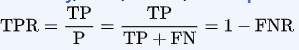


Random Forest performs best on the sensitivity metric, followed closely by Extra Trees classifer. Although Naive Bayes isn't too bad but still there is a significant 10% gap. However we must remeber viewing sensitivity alone can be very misleading as classifiers could predict most values as positive and still get a good recall score

In [77]:
Recall_NB = round(TP_NB/P_NB,2)
Recall_RF = round(TP/P,2)
Recall_ET = round(TP_ET/P_ET,2)
print("Sensitivity/Recall/TPR (Naive Bayes): " + str(Recall_NB))
print("Sensitivity/Recall/TPR (Random Forest): " + str(Recall_RF))
print("Sensitivity/Recall/TPR (Extra Tree Classifier): " + str(Recall_ET))

Sensitivity/Recall/TPR (Naive Bayes): 0.84
Sensitivity/Recall/TPR (Random Forest): 0.93
Sensitivity/Recall/TPR (Extra Tree Classifier): 0.92


# 4.4 Specificity/Selectivity/True Negative Rate(TNR)
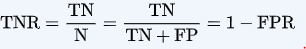

Each classifer's performance is sub-par when it comes to rightly identifying a bad credit (negative class), However Naive Bayes seems significantly better than other 2 tree classifiers

In [78]:
print("Specificity/Selectivity/TNR (Naive Bayes): " + str(round(TN_NB/N_NB,2)))
print("Specificity/Selectivity/TNR (Random Forest): " + str(round(TN/N,2)))
print("Specificity/Selectivity/TNR (Extra Tree Classifier): " + str(round(TN_ET/N_ET,2)))

Specificity/Selectivity/TNR (Naive Bayes): 0.54
Specificity/Selectivity/TNR (Random Forest): 0.44
Specificity/Selectivity/TNR (Extra Tree Classifier): 0.41


# 4.5 Precision 
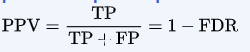

Precision is used to measure the effect of False postives, which is very vital for the credit risk data set, and performance of each of the classfiers is good if not great. Naive Bayes has slightly higher precision than Random Forest which performs slightly better than Extra Tree Classifier. 

In [79]:
Precision_NB = round(TP_NB/(TP_NB+FP_NB),2)
Precision_RF = round(TP/(TP+FP),2)
Precision_ET = round(TP_ET/(TP_ET+FP_ET),2)
print("Precision (Naive Bayes): " + str(Precision_NB))
print("Precision (Random Forest): " + str(Precision_RF))
print("Precision (Extra Tree Classifier): " + str(Precision_ET))

Precision (Naive Bayes): 0.81
Precision (Random Forest): 0.8
Precision (Extra Tree Classifier): 0.79


# 4.6 F Measure

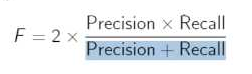

F measure is a measure which tries to balance the effect of precision and Recall by combining them together. Overall Random Forest has the highest score and is closely followed by Extra Tree Classifier, Naive Bayes is also isn't far away from both these classifiers but there's significant distance Naive Bayes and the other 2 classifiers.

In [80]:
F_NB = round((2 * Precision_NB * Recall_NB)/ (Precision_NB + Recall_NB),2)
F_RF = round((2 * Precision_RF * Recall_RF)/ (Precision_RF + Recall_RF),2)
F_ET = round((2 * Precision_ET * Recall_ET)/ (Precision_ET + Recall_ET),2)
print("F Measure (Naive Bayes): " + str(F_NB))
print("F Measure (Random Forest): " + str(F_RF))
print("F Measure (Extra Tree Classifier): " + str(F_ET))

F Measure (Naive Bayes): 0.82
F Measure (Random Forest): 0.86
F Measure (Extra Tree Classifier): 0.85


# 4.7 Receiver Operating Characteristic (ROC)

Since we know that ROC is a class specific feature we'll chart out ROC for both the classes separately. From the below plots it's eveident that all the classifier almost have the same amount of area for each of the classes, but Naive Bayes and Random Forest are slightly better than Extra Trees classifier

# 4.7.1 - Naive Bayes

<h3>Positive Class - Good Loans</h3>

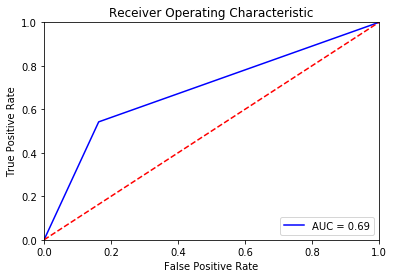

In [81]:
# calculate the fpr and tpr for all thresholds of the classification
probs = nb.predict_proba(X_test)
preds = probs[:,1]
y_test_1 = y_test.map({1:0, 2:1})
y_pred_1 = np.where(y_pred_NB==1, 0, 1) 
fpr, tpr, threshold = metrics.roc_curve(y_test_1, y_pred_1)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<h3>Negative Class - Bad Loans</h3>

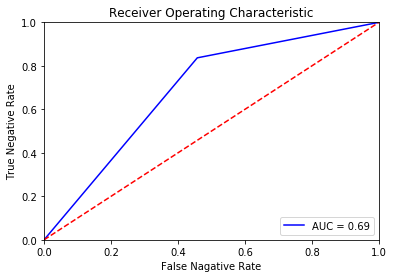

In [82]:
y_test_2 = y_test.map({2:0, 1:1})
y_pred_2 = np.where(y_pred_NB==2, 0, 1) 
fpr, tpr, threshold = metrics.roc_curve(y_test_2, y_pred_2)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Negative Rate')
plt.xlabel('False Nagative Rate')
plt.show()

# 4.7.2 - Random  Forest

<h3>Positive Class - Good Loans</h3>

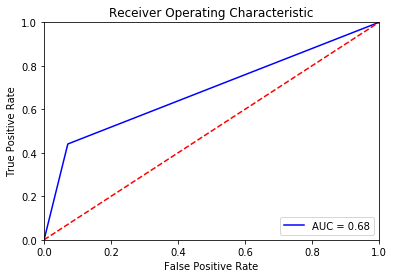

In [83]:
# calculate the fpr and tpr for all thresholds of the classification
probs = Random_Forest.predict_proba(X_test)
preds = probs[:,1]
y_test_1 = y_test.map({1:0, 2:1})
y_pred_1 = np.where(y_pred_RF==1, 0, 1) 
fpr, tpr, threshold = metrics.roc_curve(y_test_1, y_pred_1)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<h3>Negative Class - Bad Loans</h3>

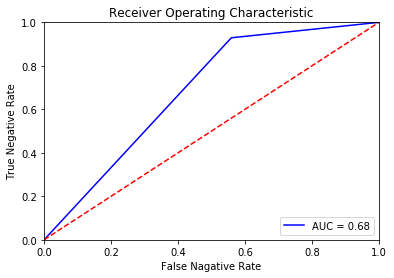

In [84]:
y_test_2 = y_test.map({2:0, 1:1})
y_pred_2 = np.where(y_pred_RF==2, 0, 1) 
fpr, tpr, threshold = metrics.roc_curve(y_test_2, y_pred_2)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Negative Rate')
plt.xlabel('False Nagative Rate')
plt.show()

# 4.7.3 - Extra Tree Classifier

<h3>Positive Class - Good Loans</h3>

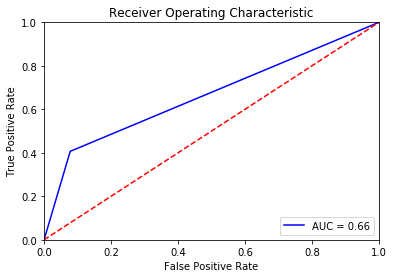

In [85]:
# calculate the fpr and tpr for all thresholds of the classification
probs = Random_Forest.predict_proba(X_test)
preds = probs[:,1]
y_test_1 = y_test.map({1:0, 2:1})
y_pred_1 = np.where(y_pred_ET==1, 0, 1) 
fpr, tpr, threshold = metrics.roc_curve(y_test_1, y_pred_1)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<h3>Negative Class - Bad Loans</h3>

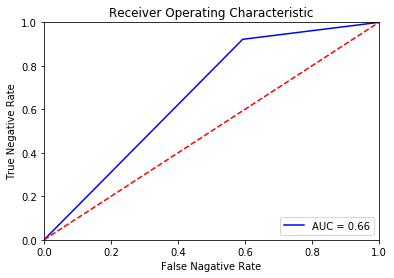

In [86]:
y_test_2 = y_test.map({2:0, 1:1})
y_pred_2 = np.where(y_pred_ET==2, 0, 1) 
fpr, tpr, threshold = metrics.roc_curve(y_test_2, y_pred_2)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Negative Rate')
plt.xlabel('False Nagative Rate')
plt.show()

# 5 Simulated Cost Benefit Analysis

Here we'll assign a cost to each of our decision and see how classifer is expected to perform for various input size. Let's start with cost assignment

<table>
    <tr>
        <th> # </th> <th> Decision </th> <th> Cost </th> <th> Description </th>
    </tr>
    <tr>
        <td> 1 </td> <td> True Positive </td> <td> 1.35 </td> <td> In this case bank loans 1 unit but gets back 1.35 as the model rightly predicts the customer as Good Loan </td>
    </tr>
    <tr>
        <td> 2 </td> <td> True Negative </td> <td> 0 </td> <td> Rightly predicts a bad credit hence no loss/profit for the bank </td>
    </tr>
    <tr>
        <td> 3 </td> <td> False Positive </td> <td> -1 </td> <td> Here the bank looses all of it's invested money as the model wrongly predicted a bad loan as good loan </td>
    </tr>
    <tr>
        <td> 4 </td> <td> False Positive </td> <td> -0.35 </td> <td> Here the bank looses a potential 35% profit as the model wrongly predicts a good loan as bad loan </td>
    </tr>
</table>

# 5.1 Customer Analysis

In this analysis the amount of loan given to a customer is kept constant and change the number of customers & see how each classifier performs. We choose the loan amount as 1000 (currency doesn't matter) as it doesn't affect our analysis.

In [102]:
# Function to get profits out of the predicted value
# Parameters
# cnf_mat_tuple - Tuple conataining confusion matrix components in this order 1. True Positive 2. False 
def GetProfits(cnf_mat_tuple, variable, classifier =  '',constant = 1000, variableLabel = 'customers', perc = 0.35):
    TP = cnf_mat_tuple[0]
    FP = cnf_mat_tuple[1]
    TN = cnf_mat_tuple[2]
    FN = cnf_mat_tuple[3]
    TP_perc = TP / (TP+FP+FN+TN)
    FP_perc = FP / (TP+FP+FN+TN)
    FN_perc = FN / (TP+FP+FN+TN)
    TN_perc = TN / (TP+FP+FN+TN)
    
    profit = []
    count = 0
    for i in range(len(variable)):
        profit.append([variable[i], 
                     round((variable[i] * TP_perc * (constant * (1 + (perc)))) - (
                         (variable[i] * FP_perc * constant) + (variable[i] * FN_perc * (constant * perc))
                     ),2), classifier])
        count = count + 1
    return pd.DataFrame(profit, columns=[variableLabel, 'profit', 'classifier'])

In [103]:
print("Sanity Test")
print("Less than 50% accuracy")
print(GetProfits((10,15,15,5),[1,5,10,15]).iloc[:,0:2]) # Less than 50% accuracy
print("Exactly 50% accuracy")
print(GetProfits((5,5,5,5),[1,5,10,15]).iloc[:,0:2]) # Exactly 50% accuracy
print("More than 50% accuracy")
print(GetProfits((10,5,5,5),[1,5,10,15]).iloc[:,0:2]) # More than 50% accuraccy. To be specific 60% accuracy

Sanity Test
Less than 50% accuracy
   customers   profit
0          1   -72.22
1          5  -361.11
2         10  -722.22
3         15 -1083.33
Exactly 50% accuracy
   customers  profit
0          1     0.0
1          5     0.0
2         10     0.0
3         15     0.0
More than 50% accuracy
   customers  profit
0          1   270.0
1          5  1350.0
2         10  2700.0
3         15  4050.0


In [89]:
customers= [10, 100, 500, 1000, 5000, 10000, 15000, 25000, 40000, 50000, 60000, 75000, 90000, 100000]

print("Naive Bayes")
df_customer_NB = GetProfits((TP_NB, FP_NB, FN_NB, TN_NB), customers, 'Naive Bayes')
print(df_customer_NB.iloc[:,0:2])

print("Random Forest")
df_customer_RF = GetProfits((TP, FP, FN, TN), customers, 'Random Forest')
print(df_customer_RF.iloc[:,0:2])

print("Extra Trees Classifier")
df_customer_ET = GetProfits((TP_ET, FP_ET, FN_ET, TN_ET), customers, 'Extra Trees Classifier')
print(df_customer_ET.iloc[:,0:2])

Naive Bayes
    customers      profit
0          10      6055.0
1         100     60550.0
2         500    302750.0
3        1000    605500.0
4        5000   3027500.0
5       10000   6055000.0
6       15000   9082500.0
7       25000  15137500.0
8       40000  24220000.0
9       50000  30275000.0
10      60000  36330000.0
11      75000  45412500.0
12      90000  54495000.0
13     100000  60550000.0
Random Forest
    customers      profit
0          10      6737.5
1         100     67375.0
2         500    336875.0
3        1000    673750.0
4        5000   3368750.0
5       10000   6737500.0
6       15000  10106250.0
7       25000  16843750.0
8       40000  26950000.0
9       50000  33687500.0
10      60000  40425000.0
11      75000  50531250.0
12      90000  60637500.0
13     100000  67375000.0
Extra Trees Classifier
    customers      profit
0          10      6605.0
1         100     66050.0
2         500    330250.0
3        1000    660500.0
4        5000   3302500.0
5       10000  

In [90]:
df_classifiers = pd.concat([df_customer_NB, df_customer_RF, df_customer_ET])

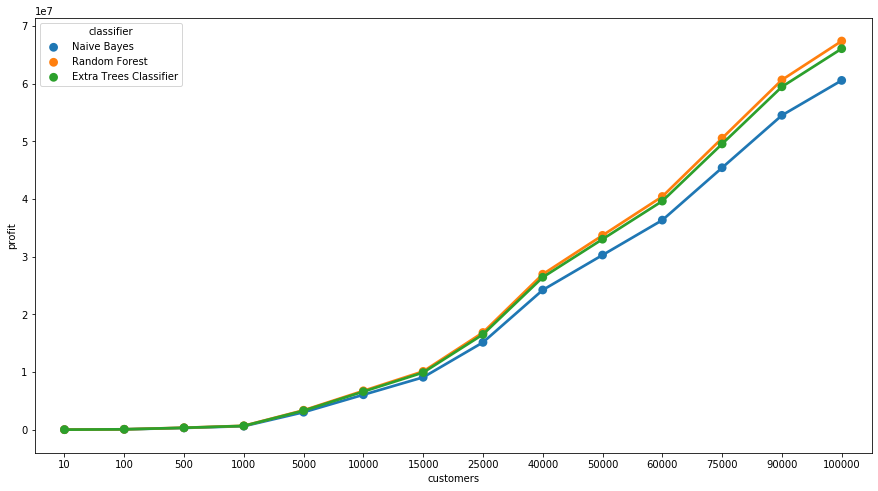

In [91]:
plt.figure(figsize=(15,8))
sns.pointplot(x="customers", y="profit", hue = "classifier", data=df_classifiers)

# 5.2 Loan Amount Analysis

In this analysis the number of customers is kept constant (i.e 10000) and the loan amount is changed & see how each classifier performs.

In [92]:
loan_amount= [1000, 2000, 3500, 5000,10000, 15000, 25000, 40000, 50000, 75000, 100000, 500000, 1000000]

print("Naive Bayes")
df_loan_amount_NB = GetProfits((TP_NB, FP_NB, FN_NB, TN_NB), loan_amount, 'Naive Bayes', 
                               variableLabel = 'Loan Amount', constant = 10000)
print(df_loan_amount_NB.iloc[:,0:2])

print("Random Forest")
df_loan_amount_RF = GetProfits((TP, FP, FN, TN), loan_amount, 'Random Forest', 
                               variableLabel = 'Loan Amount', constant = 10000)
print(df_loan_amount_RF.iloc[:,0:2])

print("Extra Trees Classifier")
df_loan_amount_ET = GetProfits((TP_ET, FP_ET, FN_ET, TN_ET), loan_amount, 'Extra Trees Classifier'
                               , variableLabel = 'Loan Amount', constant = 10000)
print(df_loan_amount_ET.iloc[:,0:2])

Naive Bayes
    Loan Amount        profit
0          1000  6.055000e+06
1          2000  1.211000e+07
2          3500  2.119250e+07
3          5000  3.027500e+07
4         10000  6.055000e+07
5         15000  9.082500e+07
6         25000  1.513750e+08
7         40000  2.422000e+08
8         50000  3.027500e+08
9         75000  4.541250e+08
10       100000  6.055000e+08
11       500000  3.027500e+09
12      1000000  6.055000e+09
Random Forest
    Loan Amount        profit
0          1000  6.737500e+06
1          2000  1.347500e+07
2          3500  2.358125e+07
3          5000  3.368750e+07
4         10000  6.737500e+07
5         15000  1.010625e+08
6         25000  1.684375e+08
7         40000  2.695000e+08
8         50000  3.368750e+08
9         75000  5.053125e+08
10       100000  6.737500e+08
11       500000  3.368750e+09
12      1000000  6.737500e+09
Extra Trees Classifier
    Loan Amount        profit
0          1000  6.605000e+06
1          2000  1.321000e+07
2          3500  2.31

In [93]:
df_classifiers_loan = pd.concat([df_loan_amount_NB, df_loan_amount_RF, df_loan_amount_ET])

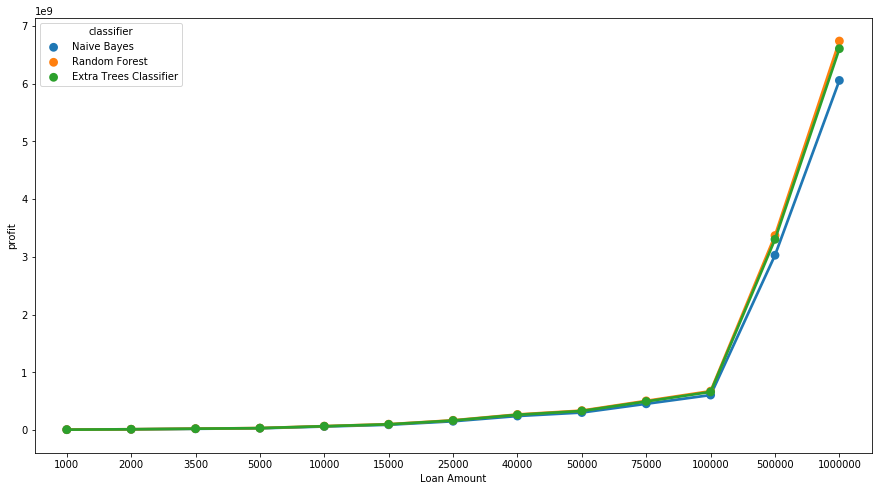

In [94]:
plt.figure(figsize=(15,8))
sns.pointplot(x="Loan Amount", y="profit", hue = "classifier", data=df_classifiers_loan)

# 5.3 Profitability Analysis

In this analysis we change the average profit percentage and check how each of the classifier works, whilst also changing either the number of customers or the loan amount

<h2> 5.3.1 Average Profit of 20%</h2>

<h3> Customer Analysis  for assumed average loan amount of 1000 (Deustche Mark) </h3>

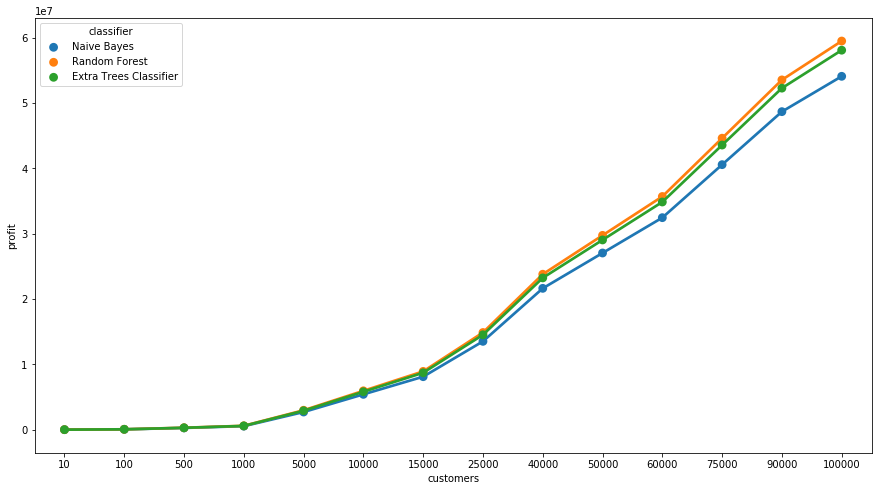

In [107]:
df_customer_NB = GetProfits((TP_NB, FP_NB, FN_NB, TN_NB), customers, 'Naive Bayes', perc = 0.2)
df_customer_RF = GetProfits((TP, FP, FN, TN), customers, 'Random Forest', perc = 0.2)
df_customer_ET = GetProfits((TP_ET, FP_ET, FN_ET, TN_ET), customers, 'Extra Trees Classifier', perc = 0.2)

df_classifiers = pd.concat([df_customer_NB, df_customer_RF, df_customer_ET])

plt.figure(figsize=(15,8))
sns.pointplot(x="customers", y="profit", hue = "classifier", data=df_classifiers)

<h3> Loan Amount Analysis for assumed average customers as 1000</h3>

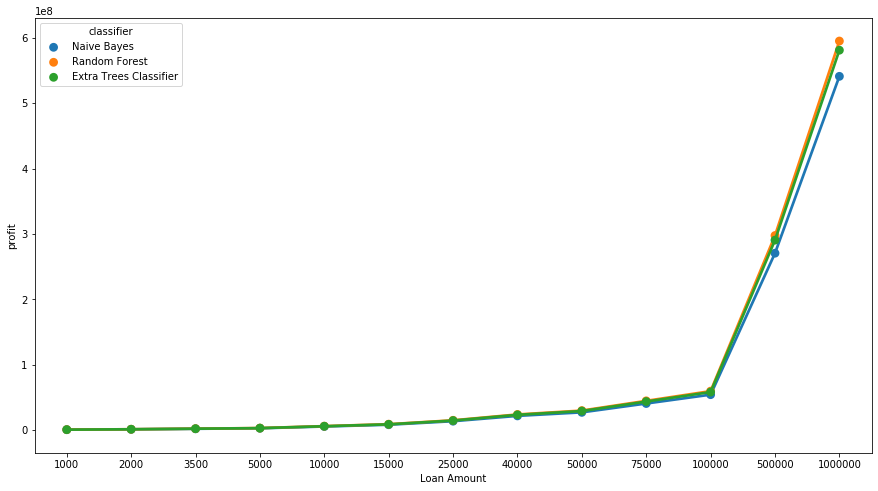

In [108]:
df_loan_amount_NB = GetProfits((TP_NB, FP_NB, FN_NB, TN_NB), loan_amount, 'Naive Bayes', 
                               variableLabel = 'Loan Amount', constant = 1000, perc = 0.2)
df_loan_amount_RF = GetProfits((TP, FP, FN, TN), loan_amount, 'Random Forest', 
                               variableLabel = 'Loan Amount', constant = 1000, perc = 0.2)
df_loan_amount_ET = GetProfits((TP_ET, FP_ET, FN_ET, TN_ET), loan_amount, 'Extra Trees Classifier'
                               , variableLabel = 'Loan Amount', constant = 1000, perc = 0.2)
df_classifiers_loan = pd.concat([df_loan_amount_NB, df_loan_amount_RF, df_loan_amount_ET])
plt.figure(figsize=(15,8))
sns.pointplot(x="Loan Amount", y="profit", hue = "classifier", data=df_classifiers_loan)

<h2> 5.3.2 Average Profit of 5% </h2>

<h3> Customer Analysis for assumed average loan amount of 1000 (Deustche Mark) </h3>

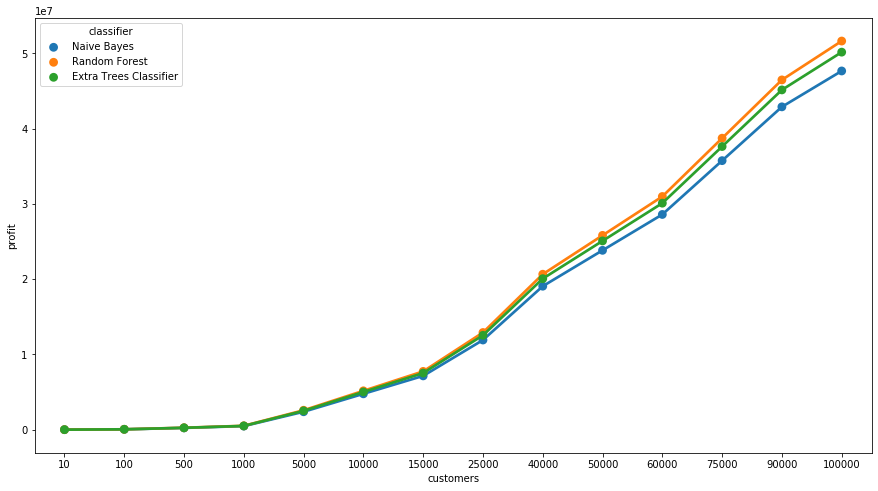

In [109]:
df_customer_NB = GetProfits((TP_NB, FP_NB, FN_NB, TN_NB), customers, 'Naive Bayes', perc = 0.05)
df_customer_RF = GetProfits((TP, FP, FN, TN), customers, 'Random Forest', perc = 0.05)
df_customer_ET = GetProfits((TP_ET, FP_ET, FN_ET, TN_ET), customers, 'Extra Trees Classifier', perc = 0.05)

df_classifiers = pd.concat([df_customer_NB, df_customer_RF, df_customer_ET])

plt.figure(figsize=(15,8))
sns.pointplot(x="customers", y="profit", hue = "classifier", data=df_classifiers)

<h3> Loan Amount Analysis for assumed average customers as 1000</h3>

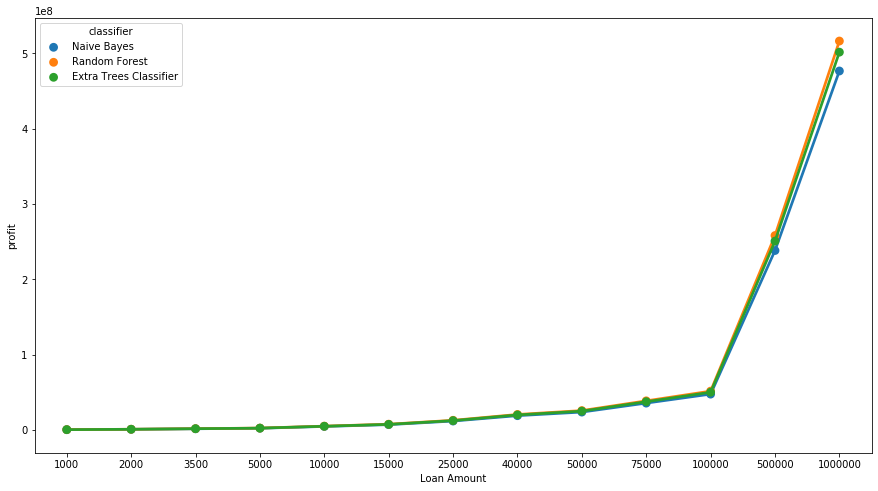

In [110]:
df_loan_amount_NB = GetProfits((TP_NB, FP_NB, FN_NB, TN_NB), loan_amount, 'Naive Bayes', 
                               variableLabel = 'Loan Amount', constant = 1000, perc = 0.05)
df_loan_amount_RF = GetProfits((TP, FP, FN, TN), loan_amount, 'Random Forest', 
                               variableLabel = 'Loan Amount', constant = 1000, perc = 0.05)
df_loan_amount_ET = GetProfits((TP_ET, FP_ET, FN_ET, TN_ET), loan_amount, 'Extra Trees Classifier'
                               , variableLabel = 'Loan Amount', constant = 1000, perc = 0.05)
df_classifiers_loan = pd.concat([df_loan_amount_NB, df_loan_amount_RF, df_loan_amount_ET])
plt.figure(figsize=(15,8))
sns.pointplot(x="Loan Amount", y="profit", hue = "classifier", data=df_classifiers_loan)

# 6. Conclusions

Thus from the analysis it's clear that all three models are profitable even as the average number of customers and the average profits percentage are coming down. As the average loan amount increases profitability also increases, similarly profitability also increases as the number of customers increases, and expectedly profitability also increases with an increase in average  profit percentage

# 7. Best Classifier

From the above simulated analysis it is clear that initially Random Forest classifier narrowly outperforms both Extra Tree classifier and the Naive Bayes classifier, but as the number of customers or the loan amount increases the distance between each classifier is significant. Overall Random Forest gives us most profitability with Extra trees classifier as a close second and Naive Bayes as a somewhat distant third.
 
<table>
    <tr> 
        <th>Rank</th> <th>Classifier</th>
    </tr>
    <tr bgcolor='green'> 
        <td>1</td> <th>Random Forest</th>
    </tr>
    <tr> 
        <td>2</td> <th>Extra Trees Classifier</th>
    </tr>
    <tr> 
        <td>3</td> <th>Naive Bayes</th>
    </tr>
</table>

# 8. Pitfalls

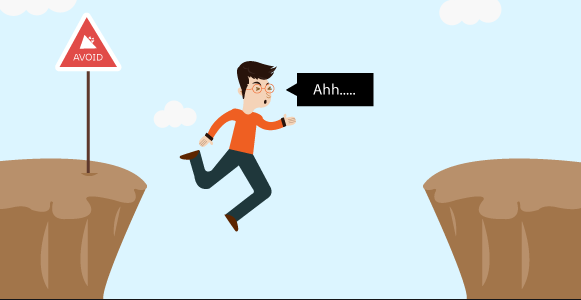

I have to acknowledge that the simulated analysis was done under the assumption that incoming test data will be of similar nature to test subset used above, but in reality that's never the case. If one were to bluntly deploy the model without accounting for sub-groups such as loan amount ..etc. It is quite likely that all the False Postives (i.e. Loans which were to be flagged bad but were flagged good) turns out to be huge amounts and all True Positives turns out to be a small amount. This would cause the bank to lose huge amount of money, therefore caution needs to excercised before deploying Model.

# 9. Recommendations


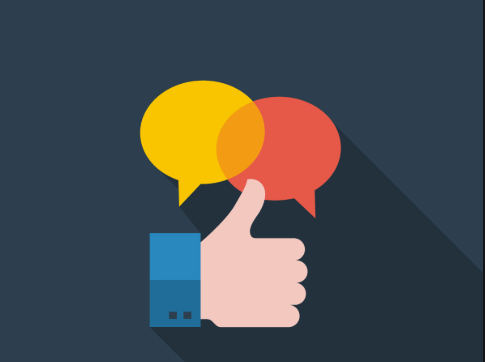

While it's good to be vary of consequences of directly but it'd be totally unwise to not deploy model at all for reasons mentioned above, think of all the human work and the cost associated with it and even after all the excercise it could still turn out to be worser than the model itself. 

Therefore, it is recommend that the potential loans are to be broadly divided into three categories  low, medium and High on the basis of the loan amount. 

For low & medium risk loans model can be directly applied category wise, even though it is likely to wrongly term few bad loans as good loans but over a long period of time, as corroborated by above cost analysis, the model is still profitable by huge margin. 

For High loan amounts model can be used as a filtering system, which filters out applications at the initial level, after loans are filtered through, it is recommended that bank follows a rigorous systemic process to reverify these applicants.

# 10. Future Work

In terms of future analysis there's very little scope, other classifiers can be tried out to see if we can improve the performnace. Since the number of Data is less it's unlikely Neural Network would surpass current standards. However we can analyse to check if there's some opportunity to do feature engineering and to subsequently check if it improves the model. 